In [25]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

In [26]:
df=pd.read_csv('../MachineLearning/datasets/Obesity Classification.csv')

In [27]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [29]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [30]:
df['Label'].unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

In [31]:
df['Label'].value_counts()

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

In [32]:
df.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

<AxesSubplot:>

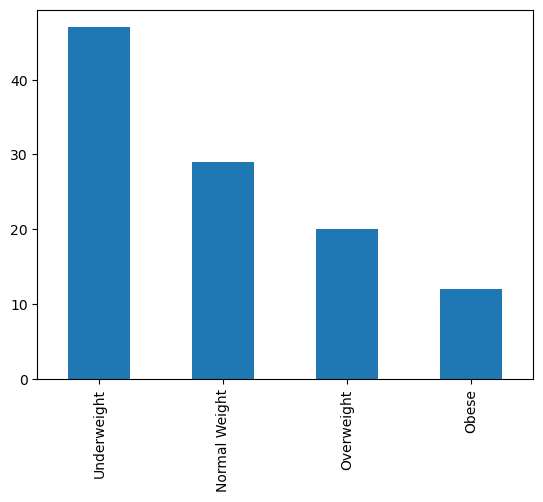

In [33]:
df['Label'].value_counts().plot(kind='bar')

In [34]:
df.select_dtypes(include=['object']).columns.tolist()

['Gender', 'Label']

In [35]:
obj_cols=df.select_dtypes(include=['object']).columns.tolist()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for obj in obj_cols:
    df[obj]=le.fit_transform(df[obj])
    

In [36]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1


In [37]:
df.corr()

,ID,Age,Gender,Height,Weight,BMI,Label
ID,1.000000,-0.298257,-0.005595,-0.008224,-0.572625,-0.615235,0.347199
Age,-0.298257,1.000000,-0.091964,-0.076896,0.465106,0.474185,-0.134396
Gender,-0.005595,-0.091964,1.000000,0.876225,0.418415,0.342342,-0.281647
Height,-0.008224,-0.076896,0.876225,1.000000,0.428890,0.354340,-0.237683
Weight,-0.572625,0.465106,0.418415,0.428890,1.000000,0.972829,-0.565555
BMI,-0.615235,0.474185,0.342342,0.354340,0.972829,1.000000,-0.589237
Label,0.347199,-0.134396,-0.281647,-0.237683,-0.565555,-0.589237,1.000000


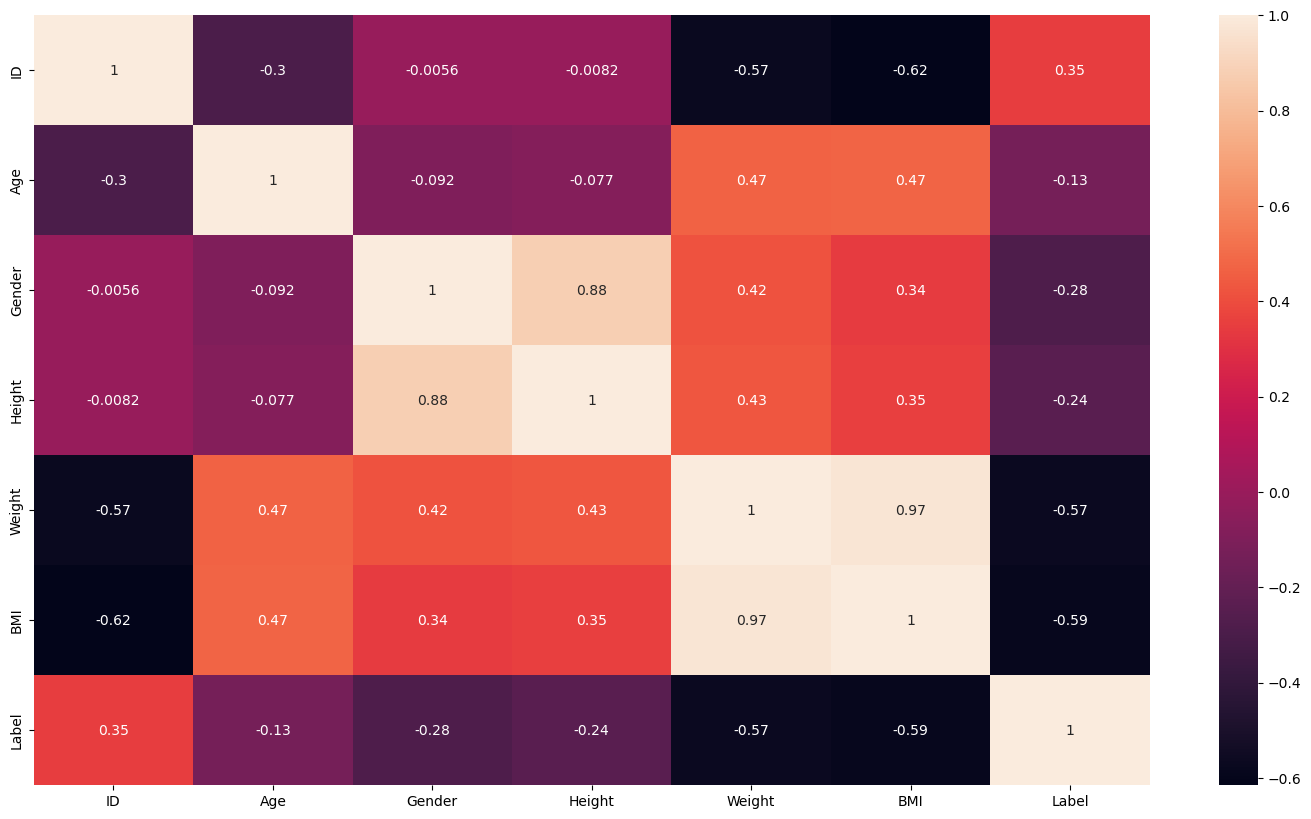

In [38]:
plt.figure(figsize=(18,10))

p=sns.heatmap(data=df.corr(),annot=True,robust=True)

In [39]:
df.drop('ID',axis=1,inplace=True)

In [40]:
X=df.drop('Label',axis=1)
Y=df['Label']

In [41]:
from sklearn.model_selection  import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=5)


In [42]:
X_train.shape

(72, 5)

In [43]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=5)

X_train_res,Y_train_res=sm.fit_resample(X_train,Y_train)

# VISULAIZATION

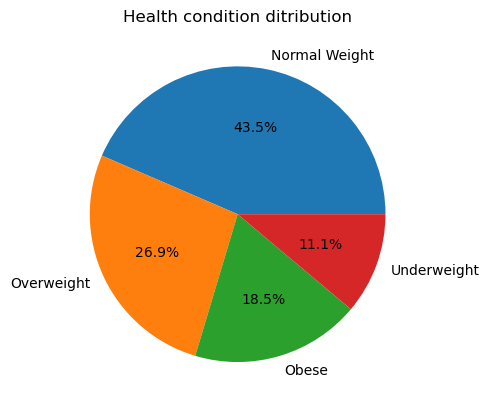

In [47]:
class_count=df['Label'].value_counts()

lables=['Normal Weight','Overweight','Obese','Underweight']
vals=class_count.values

plt.pie(vals, labels=lables, autopct="%1.1f%%")
plt.title('Health condition ditribution')

plt.show()    

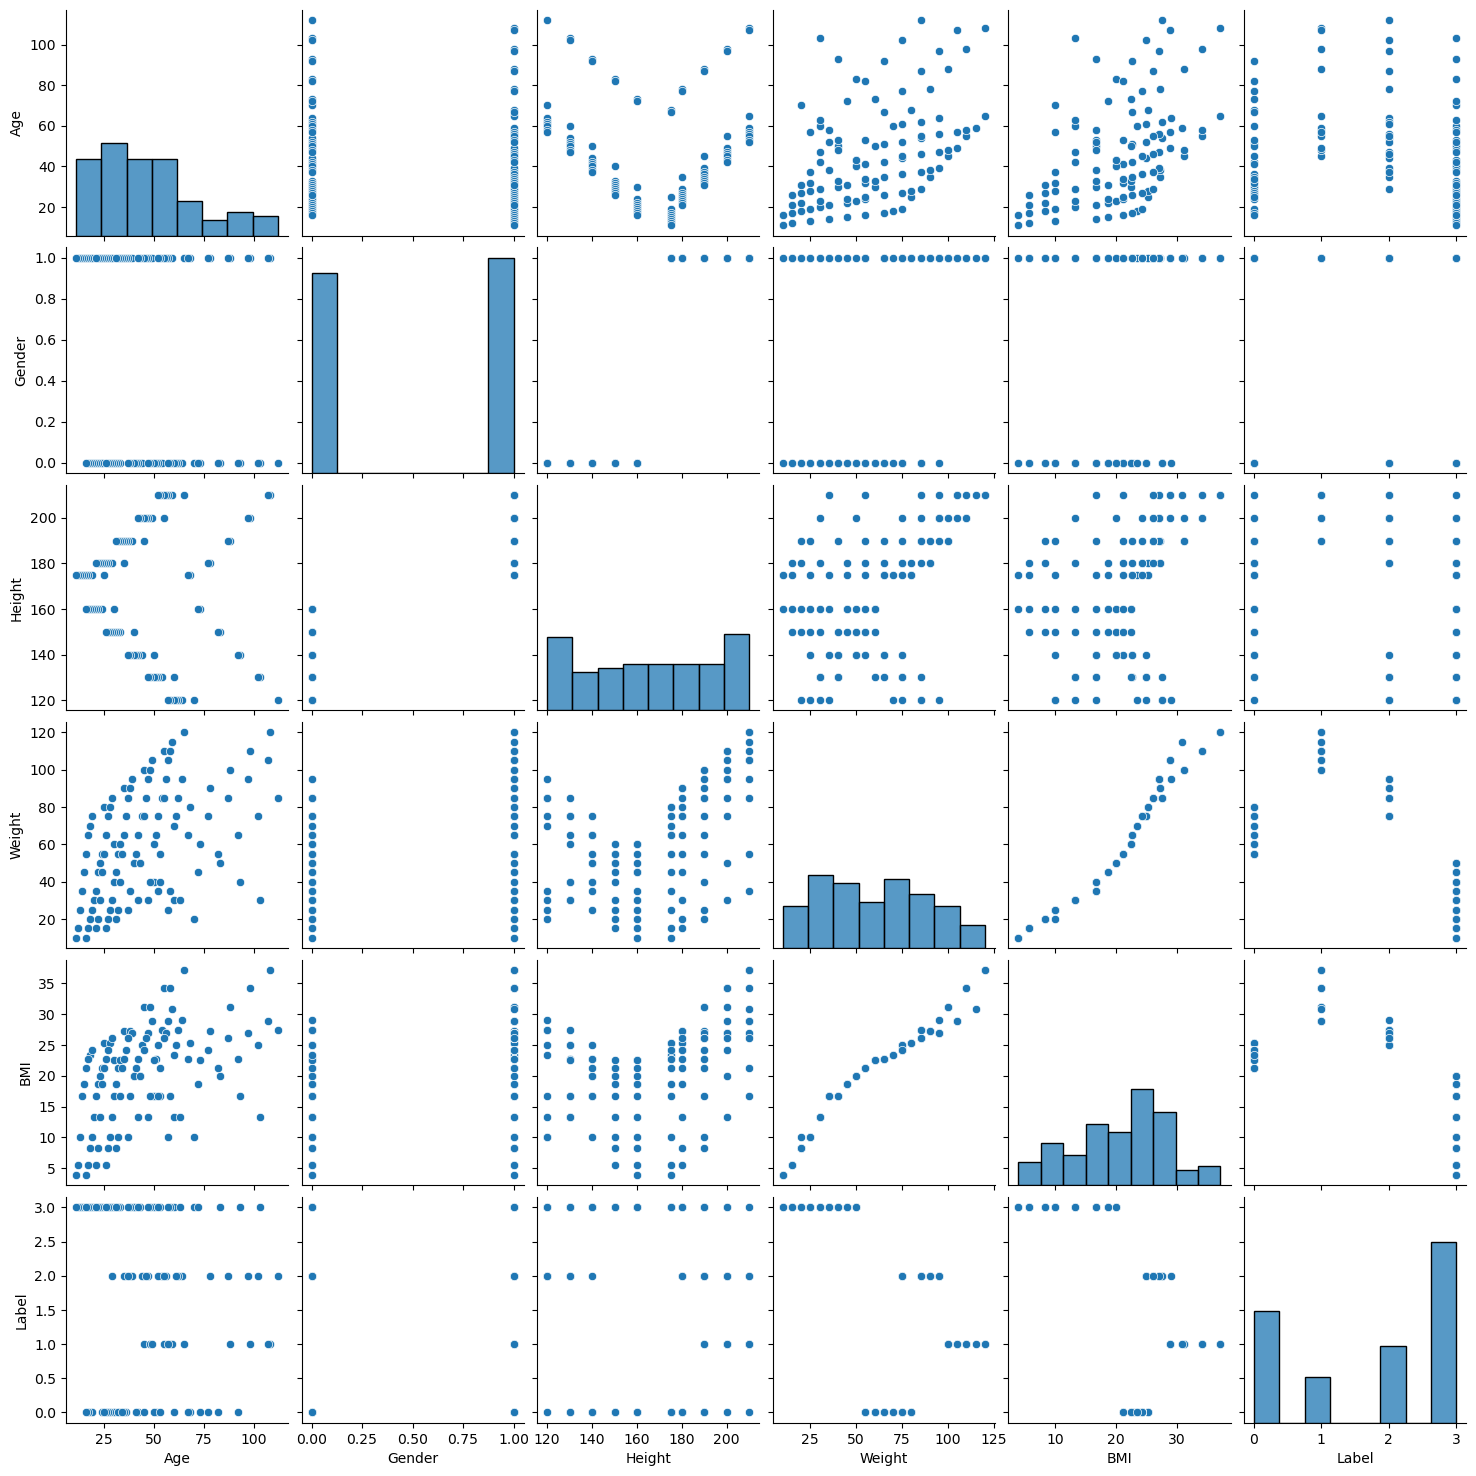

In [48]:
sns.pairplot(df)

d:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = functio

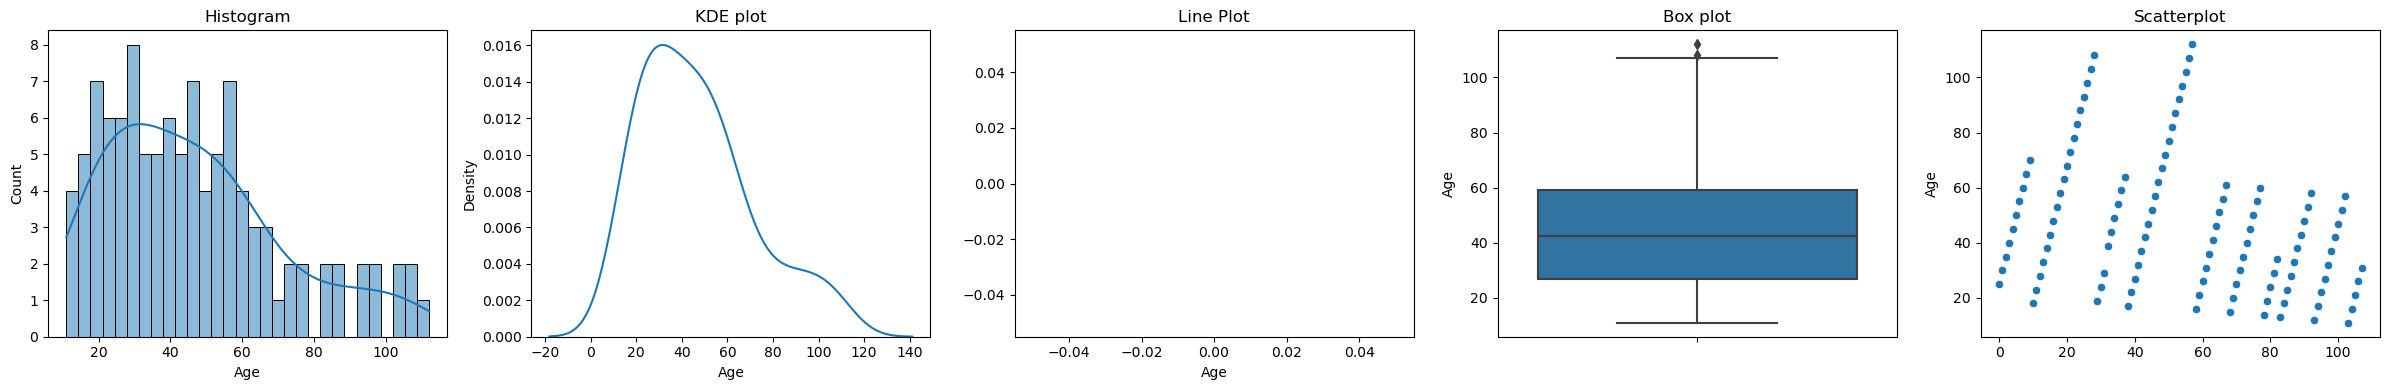

d:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


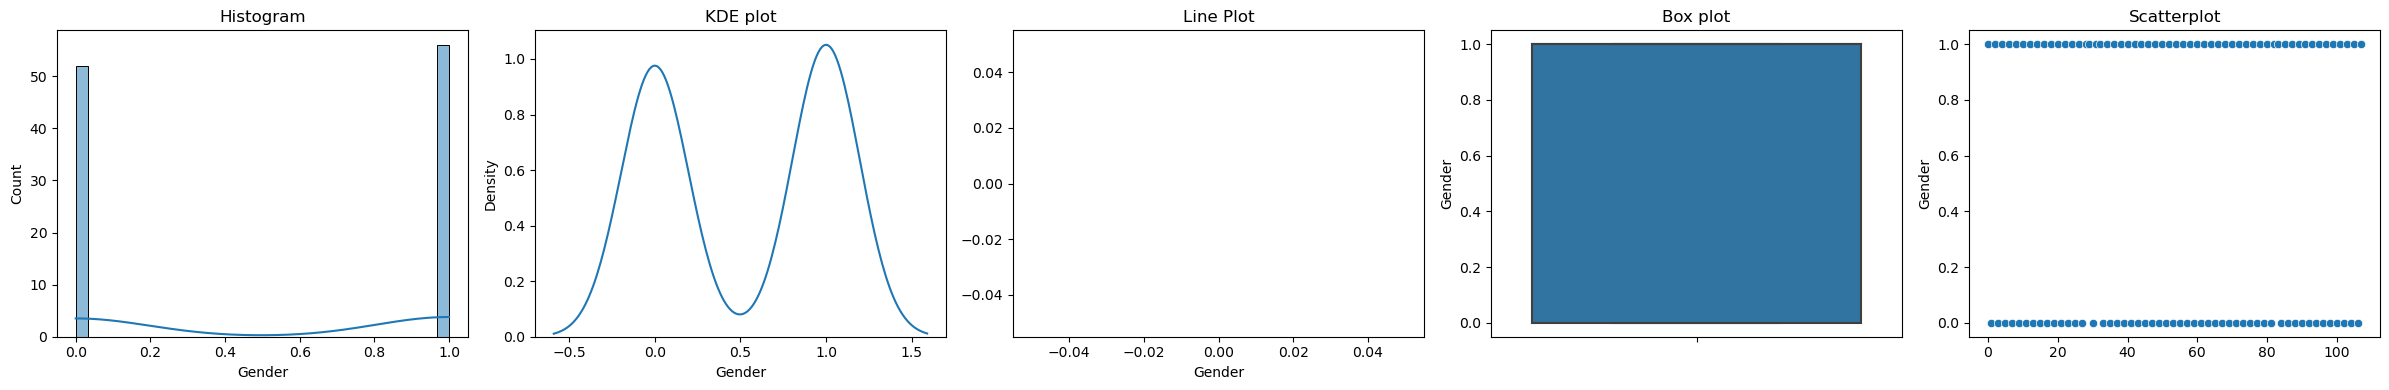

d:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = functio

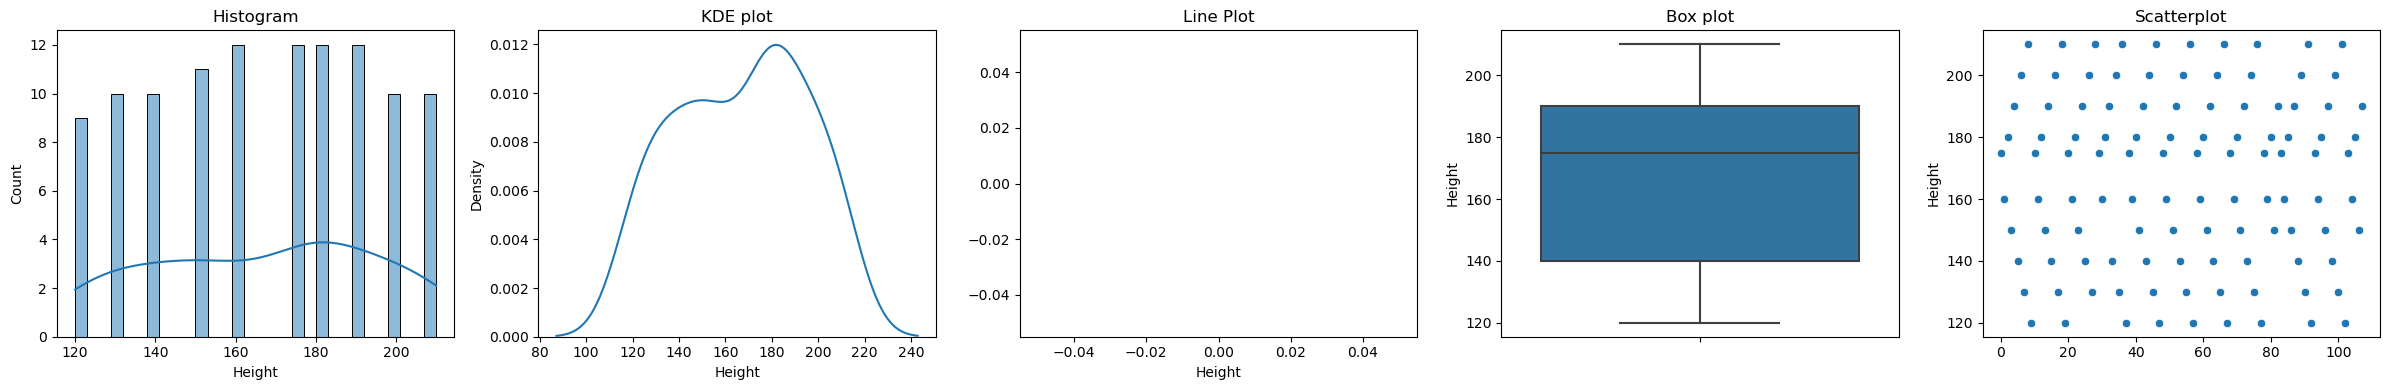

d:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = functio

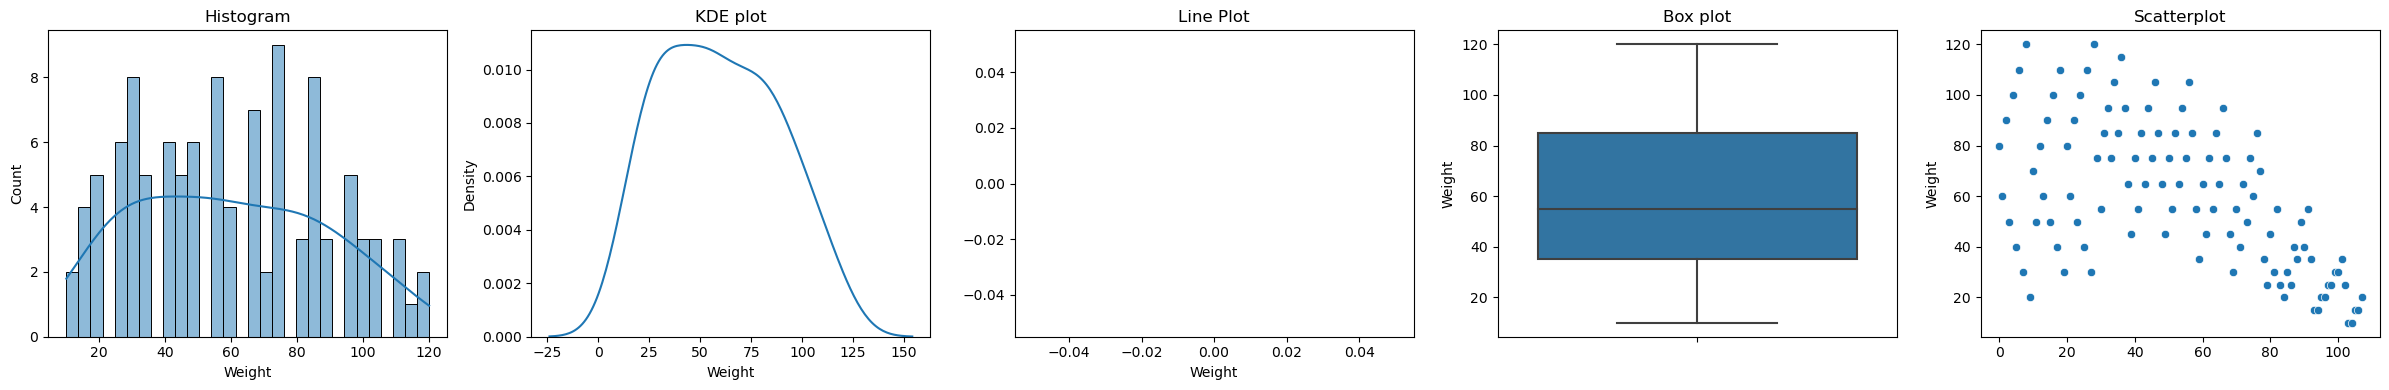

d:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = functio

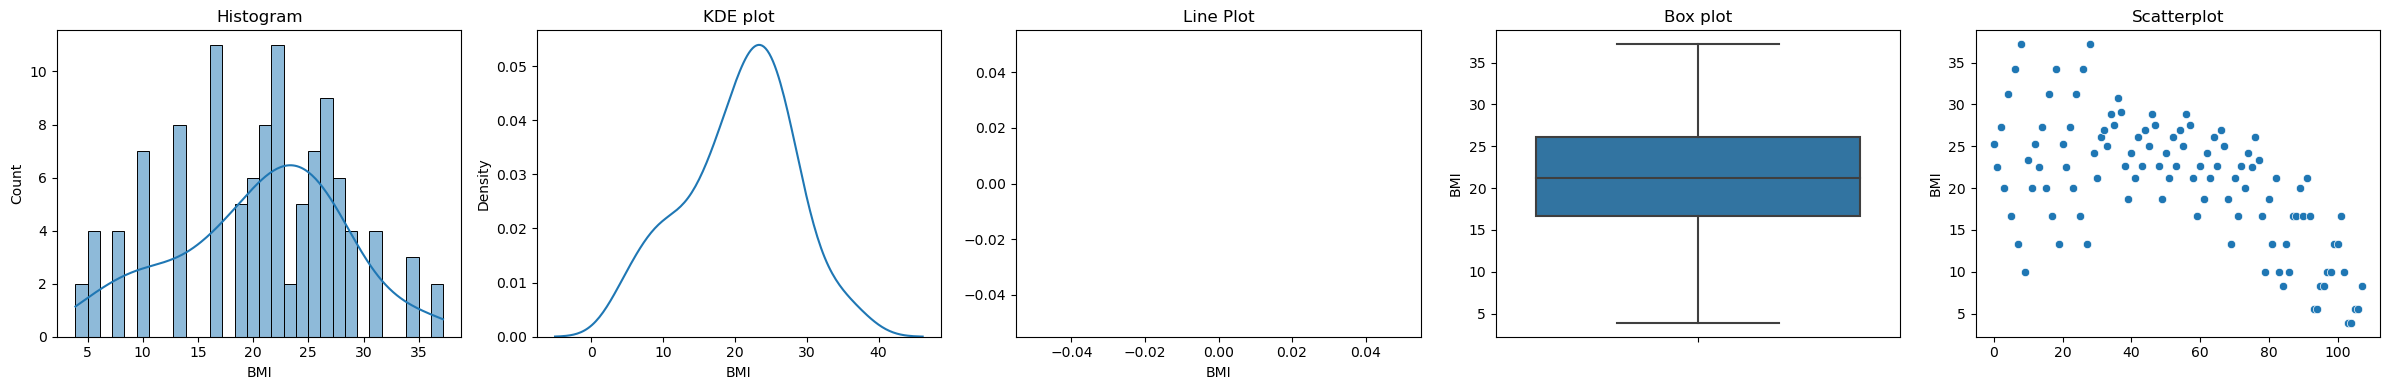

d:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\svygralingam\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = functio

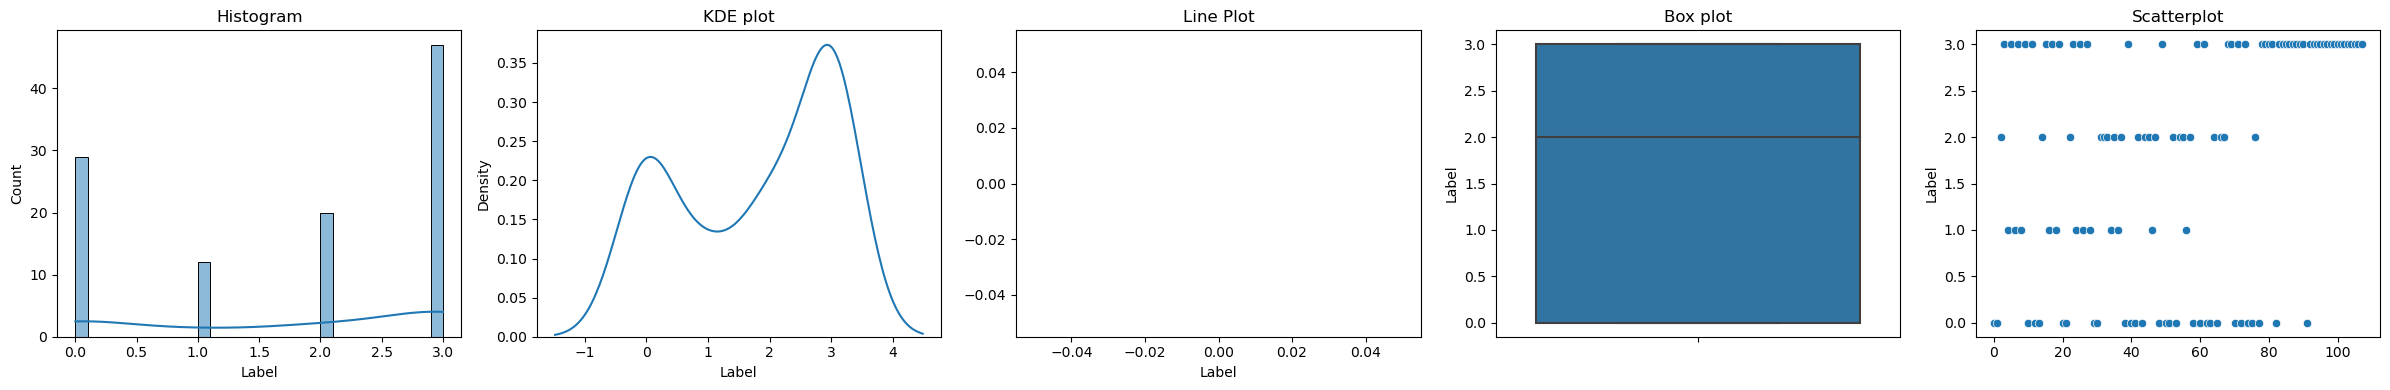

In [55]:
def plots(data,variable):
    if df[variable].dtype!='object':
        fig,ax=plt.subplots(1,5,figsize=(24,4))

        sns.histplot(data[variable],bins=30,kde=True,ax=ax[0])
        ax[0].set_title('Histogram')
        
        sns.kdeplot(data[variable],ax=ax[1])
        ax[1].set_title('KDE plot')
        
        sns.lineplot(data[variable],ax=ax[2])
        ax[2].set_title('Line Plot')
        
        sns.boxplot(y=data[variable],ax=ax[3])
        ax[3].set_title('Box plot')
        
        sns.scatterplot(x=data.index,y=data[variable],ax=ax[4])
        ax[4].set_title('Scatterplot')
        
        plt.tight_layout()
        plt.show()
for i in df.columns:
    plots(df ,i)        

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_res,Y_train_res)

y_pred=lr.predict(X_test)


d:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
y_pred

array([3, 0, 2, 3, 0, 2, 2, 2, 2, 2, 3, 0, 0, 1, 0, 3, 3, 2, 3, 3, 0, 3,
       2, 1, 1, 3, 3, 3, 3, 1, 3, 2, 1, 3, 0, 2])

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score

accuracy_score(Y_test,y_pred)


0.7222222222222222

In [60]:
confusion_matrix(Y_test,y_pred)

array([[ 7,  0,  3,  1],
       [ 0,  2,  3,  0],
       [ 0,  3,  4,  0],
       [ 0,  0,  0, 13]], dtype=int64)

[Text(0.5, 0, 'Normal Weight'),
 Text(1.5, 0, 'Overweight'),
 Text(2.5, 0, 'Obese'),
 Text(3.5, 0, 'Underweight')]

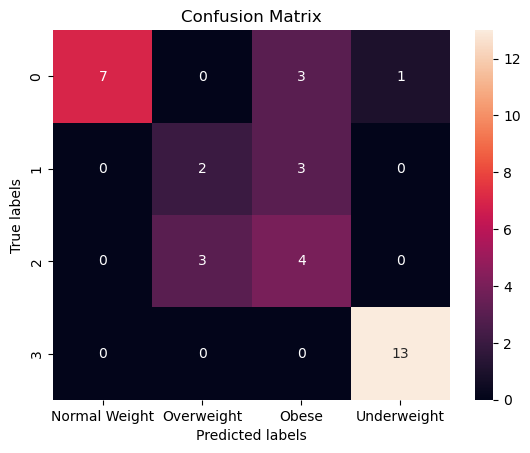

In [62]:
ax=plt.subplot()

sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,ax=ax)

ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal Weight", "Overweight", "Obese", "Underweight"])

In [63]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.40      0.40      0.40         5
           2       0.40      0.57      0.47         7
           3       0.93      1.00      0.96        13

    accuracy                           0.72        36
   macro avg       0.68      0.65      0.65        36
weighted avg       0.77      0.72      0.73        36

